# HOMEWORK 5

In this homework you are going to implement the **Floyd-Steinberg** dithering algorithm. Dithering, in general, means that we are adding noise to the signal (in our case digital image) in order to perceive it better. In other words, by adding the noise the objective quality will be worse but the subjective quality will be better (i.e. the image will "look" better).

The details of FS dithering can be found in this [wiki](https://en.wikipedia.org/wiki/Floyd–Steinberg_dithering) page. In order to implement the dithering, we will implement the following steps:

- Define colour pallette
- Quantize the image to obtain the baseline and compute the average quantization error
- Implement FS dithering and compute the average quantization error
- You will also have to answer the question at the end of this notebook.

Note: In this homework, you will have the chance to earn some extra points. See the "Bonus" section at the end of the notebook. Good luck!

As always, you are encouraged to use your own images :-)

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Let's load the image.

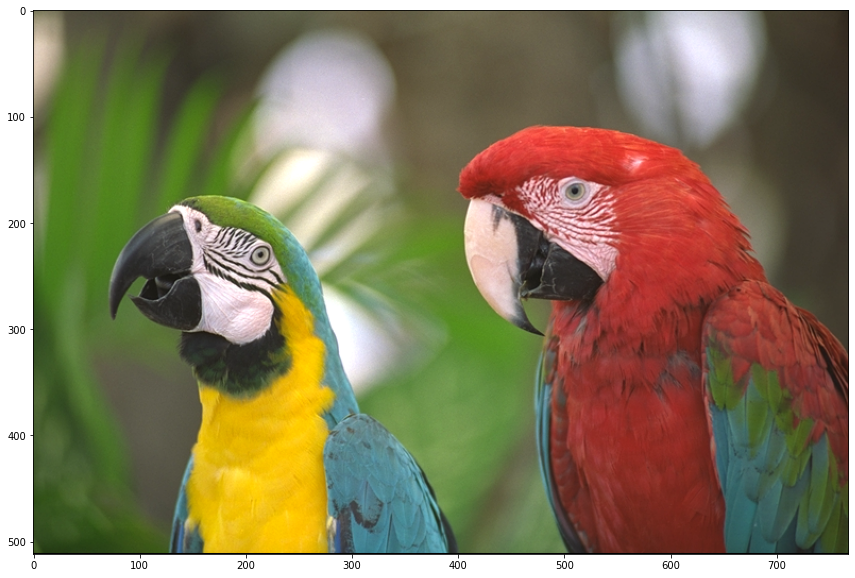

In [2]:
# Load image
img = cv2.imread('data/kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)

Let's start with gray tones first.

In [3]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

Using the colour pallette, let's quantize the original image.

In [4]:
# Cast the image to float
img =img.astype(np.float32)
# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)
colors_rows, _ = colors.shape

for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        square_of_diff = (colors - pixel) ** 2
        Euclidean_distances = np.array([ np.sum(square_of_diff[r, :]) ** 0.5 for r in range(colors_rows)])
        index = np.where(Euclidean_distances==Euclidean_distances.min())
        # Apply quantization
        quantized[r, c, :] = colors[index[0][0]]

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x80db0c8>)

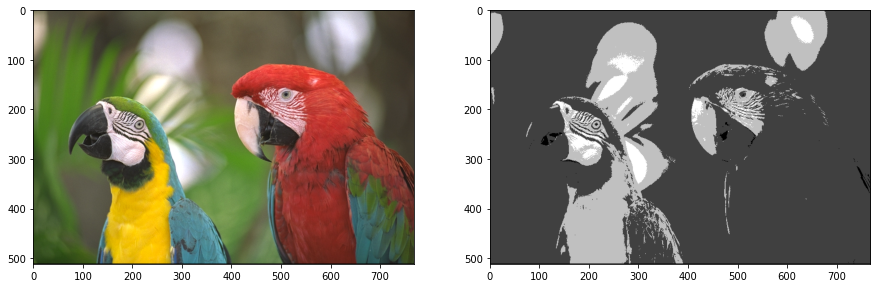

In [5]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(img.astype(np.uint8))
plt.subplot(122), plt.imshow(quantized.astype(np.uint8))

In [8]:
# Compute average quantization error
diff = img.astype(np.float32) - quantized.astype(np.float32)
avg_quant_error = np.mean(np.absolute(diff))
mse = np.mean(diff**2)
print(f'avg_quant_error: {avg_quant_error}')
print(f'mse: {mse}')

avg_quant_error: 32.75775146484375
mse: 2140.2978515625


### Floyd-Steinberg Dithering

We are now going to implement the FS dithering and compare it to the optimally quantized image we have calculated above.

In [9]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)
seven_to_sixteen = 7.0 / 16.0
three_to_sixteen = 3.0 / 16.0
five_to_sixteen  = 5.0 / 16.0
one_to_sixteen   = 1.0 / 16.0
colors_rows, _   = colors.shape

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the pixel value of temporal copy
        pixel = img_tmp[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        square_of_diff = (colors - pixel) ** 2
        Euclidean_distances = np.array([np.sum(square_of_diff[r, :]) ** 0.5 for r in range(colors_rows)])
        index = np.where(Euclidean_distances==Euclidean_distances.min())
        new_pixel = colors[index[0][0]]
        
        # Compute quantization error
        quant_error = pixel - new_pixel
        
        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r,   c+1] = img_tmp[r,   c+1] + (seven_to_sixteen * quant_error)
        img_tmp[r+1, c-1] = img_tmp[r+1, c-1] + (three_to_sixteen * quant_error)
        img_tmp[r+1, c]   = img_tmp[r+1, c]   + (five_to_sixteen * quant_error)
        img_tmp[r+1, c+1] = img_tmp[r+1, c+1] + (one_to_sixteen * quant_error)
        
        # Apply dithering
        dithering[r, c, :] = new_pixel

(<AxesSubplot:title={'center':'Dithering'}>,
 <matplotlib.image.AxesImage at 0x6625dc8>)

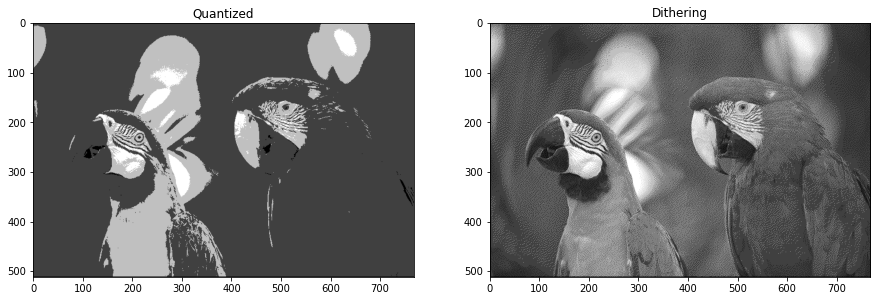

In [10]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121, title="Quantized"), plt.imshow(quantized.astype(np.uint8))   # optimally quantized
plt.subplot(122, title="Dithering"), plt.imshow(dithering.astype(np.uint8))   # dithering

(<AxesSubplot:title={'center':'Dithering'}>,
 <matplotlib.image.AxesImage at 0x6723d08>)

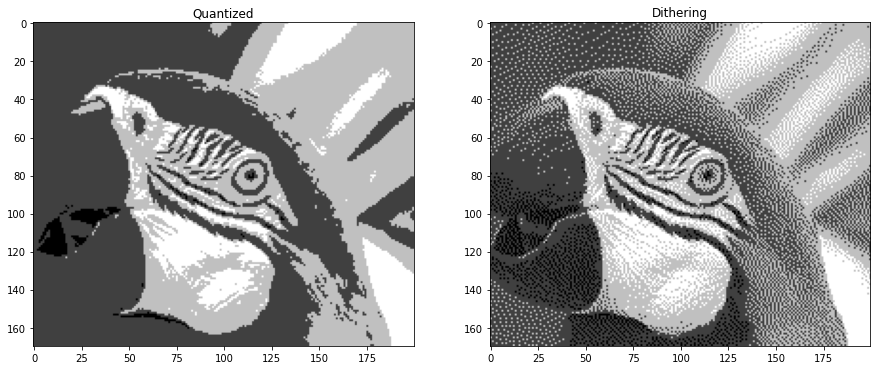

In [11]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121, title="Quantized"), plt.imshow(quantized.astype(np.uint8)[150:320, 100:300])   # optimally quantized
plt.subplot(122, title="Dithering"), plt.imshow(dithering.astype(np.uint8)[150:320, 100:300])   # dithering

In [12]:
# Compute average quantization error for dithered image
diff_dith = img.astype(np.float32) - dithering.astype(np.float32)
avg_dith_error = np.mean(np.absolute(diff_dith))
mse_dith = np.mean(diff_dith**2)
print(f'avg_dith_error: {avg_dith_error}')
print(f'mse_dith: {mse_dith}')

avg_dith_error: 41.83168029785156
mse_dith: 3303.32763671875


### Questions

- Which image has higher quantization error? Optimally quantized or dithered?
- Which image looks better to you?
- Can you repeat the same process using only two colours: black and white? Show me :-)

### Answers

- average quantization error for optimally quantized image is 32.75775 (MSE = 2140), average quantization error for
dithered image is 41.83168 (MSE = 3303). This result is because of adding error intentionally;
- dithered image looks better to me;
- two colors (black and white) implementation is below.

In [13]:
# Black, white
colors = np.array([[0, 0, 0], [255, 255, 255]])

In [14]:
# Cast the image to float
img =img.astype(np.float32)
# Prepare for quantization
rows, cols, channels = img.shape
quantized_bin = np.zeros_like(img)
colors_rows, _ = colors.shape

for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        square_of_diff = (colors - pixel) ** 2
        Euclidean_distances = np.array([ np.sum(square_of_diff[r, :]) ** 0.5 for r in range(colors_rows)])
        index = np.where(Euclidean_distances==Euclidean_distances.min())
        # Apply quantization
        quantized_bin[r, c, :] = colors[index[0][0]]

(<AxesSubplot:title={'center':'Quantized bin'}>,
 <matplotlib.image.AxesImage at 0x84c5e88>)

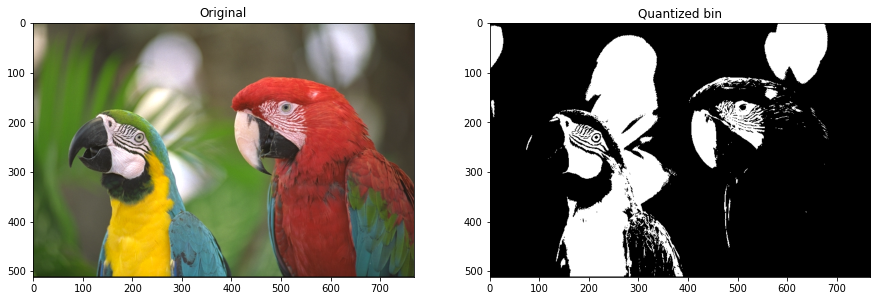

In [15]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121, title="Original"), plt.imshow(img.astype(np.uint8))
plt.subplot(122, title="Quantized bin"), plt.imshow(quantized_bin.astype(np.uint8))

In [16]:
# Compute average quantization error
diff_bin = img.astype(np.float32) - quantized_bin.astype(np.float32)
avg_bin_error = np.mean(np.absolute(diff_bin))
mse_bin = np.mean(diff_bin**2)
print(f'avg_bin_error: {avg_bin_error}')
print(f'mse_bin: {mse_bin}')

avg_bin_error: 82.05587768554688
mse_bin: 8596.01171875


In [17]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp_bin = np.copy(img)
dithering_bin = np.zeros_like(img)
colors_rows, _   = colors.shape

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the pixel value of temporal copy
        pixel = img_tmp_bin[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        square_of_diff = (colors - pixel) ** 2
        Euclidean_distances = np.array([np.sum(square_of_diff[r, :]) ** 0.5 for r in range(colors_rows)])
        index = np.where(Euclidean_distances==Euclidean_distances.min())
        new_pixel = colors[index[0][0]]
        
        # Compute quantization error
        #quant_error = new_pixel - pixel
        quant_error = pixel - new_pixel
        
        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp_bin[r,   c+1] = img_tmp_bin[r,   c+1] + (seven_to_sixteen * quant_error)
        img_tmp_bin[r+1, c-1] = img_tmp_bin[r+1, c-1] + (three_to_sixteen * quant_error)
        img_tmp_bin[r+1, c]   = img_tmp_bin[r+1, c]   + (five_to_sixteen * quant_error)
        img_tmp_bin[r+1, c+1] = img_tmp_bin[r+1, c+1] + (one_to_sixteen * quant_error)
        
        # Apply dithering
        dithering_bin[r, c, :] = new_pixel

(<AxesSubplot:title={'center':'Dithering bin'}>,
 <matplotlib.image.AxesImage at 0x10f2d1c8>)

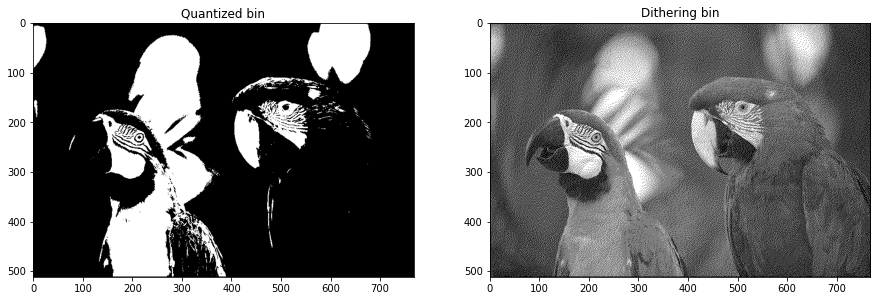

In [18]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121, title="Quantized bin"), plt.imshow(quantized_bin.astype(np.uint8))   # optimally quantized
plt.subplot(122, title="Dithering bin"), plt.imshow(dithering_bin.astype(np.uint8))   # dithering

(<AxesSubplot:title={'center':'Dithering bin'}>,
 <matplotlib.image.AxesImage at 0x11454e48>)

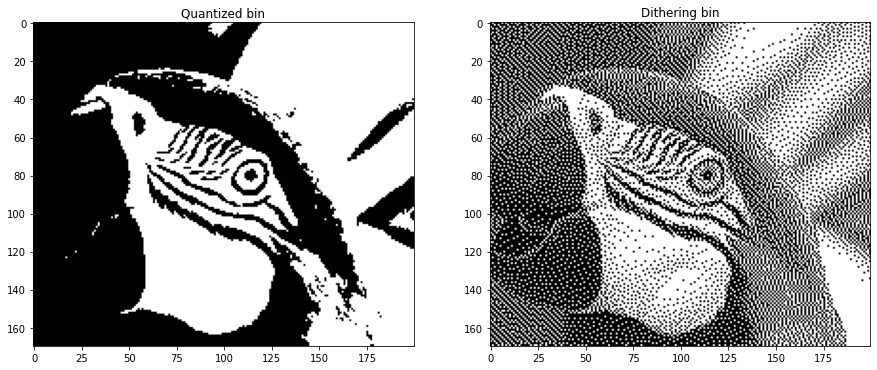

In [19]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121, title="Quantized bin"), plt.imshow(quantized_bin.astype(np.uint8)[150:320, 100:300])   # optimally quantized
plt.subplot(122, title="Dithering bin"), plt.imshow(dithering_bin.astype(np.uint8)[150:320, 100:300])   # dithering

In [20]:
# Compute average quantization error for dithered image
diff_dith_bin = img.astype(np.float32) - dithering_bin.astype(np.float32)
avg_dith_error_bin = np.mean(np.absolute(diff_dith_bin))
mse_dith_bin = np.mean(diff_dith_bin**2)
print(f'avg_dith_error_bin: {avg_dith_error_bin}')
print(f'mse_dith_bin: {mse_dith_bin}')

avg_dith_error_bin: 106.18179321289062
mse_dith_bin: 14748.126953125


### Bonus Points

Repeat the homework using a diffrerent image pallette. For instance, you can use an optimal colour pallette that we can calculate via k-means algorithm. The following snippet of code will give you the 16 optimal colours for your original image.

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=16).fit(np.reshape(img, (-1, 3)))
colors = kmeans.cluster_centers_

Apply FS dithering the same way you did before.

In [22]:
print(colors)

[[111.206665 141.0637    74.06871 ]
 [212.43777  196.10707  194.8683  ]
 [ 76.49077   88.73094   51.157944]
 [207.77377   69.08768   58.85814 ]
 [172.3597   166.37268  158.30429 ]
 [235.48051  187.96411   11.274582]
 [152.93025   55.196697  48.059845]
 [ 86.16672  124.43465   41.63446 ]
 [138.10681  138.37686  114.94324 ]
 [100.85811   96.57013   72.99567 ]
 [ 62.486588  62.09857   45.159134]
 [239.9351   229.10435  231.43585 ]
 [ 89.84965  140.98642  147.92096 ]
 [ 63.147167  97.39013   95.52395 ]
 [ 42.565918  39.48989   32.756996]
 [112.995895  45.397263  37.253925]]


In [23]:
# Cast the image to float
img =img.astype(np.float32)
# Prepare for quantization
rows, cols, channels = img.shape
quantized_bonus = np.zeros_like(img)
colors_rows, _ = colors.shape

for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        square_of_diff = (colors - pixel) ** 2
        Euclidean_distances = np.array([ np.sum(square_of_diff[r, :]) ** 0.5 for r in range(colors_rows)])
        index = np.where(Euclidean_distances==Euclidean_distances.min())
        # Apply quantization
        quantized_bonus[r, c, :] = colors[index[0][0]]

(<AxesSubplot:title={'center':'Quantized bonus'}>,
 <matplotlib.image.AxesImage at 0x1ec33308>)

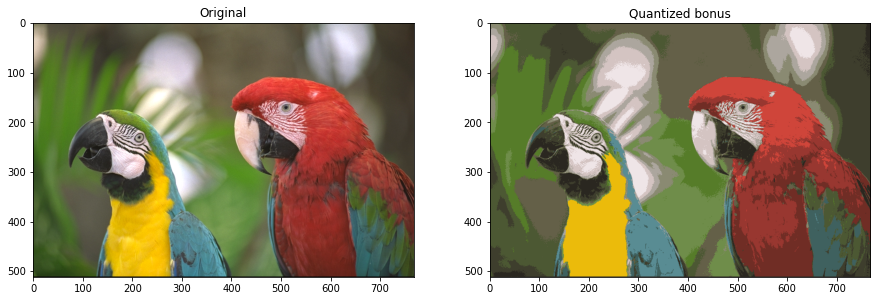

In [24]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121, title="Original"), plt.imshow(img.astype(np.uint8))
plt.subplot(122, title="Quantized bonus"), plt.imshow(quantized_bonus.astype(np.uint8))

In [25]:
# Compute average quantization error
diff_quant_bonus = img.astype(np.float32) - quantized_bonus.astype(np.float32)
avg_quant_error_bonus = np.mean(np.absolute(diff_quant_bonus))
mse_quant_bonus = np.mean(diff_quant_bonus**2)
print(f'avg_quant_error_bonus: {avg_quant_error_bonus}')
print(f'mse_quant_bonus: {mse_quant_bonus}')

avg_quant_error_bonus: 9.068093299865723
mse_quant_bonus: 140.3779754638672


In [26]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp_bonus = np.copy(img)
dithering_bonus = np.zeros_like(img)
colors_rows, _   = colors.shape

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the pixel value of temporal copy
        pixel = img_tmp_bonus[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        square_of_diff = (colors - pixel) ** 2
        Euclidean_distances = np.array([np.sum(square_of_diff[r, :]) ** 0.5 for r in range(colors_rows)])
        index = np.where(Euclidean_distances==Euclidean_distances.min())
        new_pixel = colors[index[0][0]]
        
        # Compute quantization error
        quant_error = pixel - new_pixel
        
        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp_bonus[r,   c+1] = img_tmp_bonus[r,   c+1] + (seven_to_sixteen * quant_error)
        img_tmp_bonus[r+1, c-1] = img_tmp_bonus[r+1, c-1] + (three_to_sixteen * quant_error)
        img_tmp_bonus[r+1, c]   = img_tmp_bonus[r+1, c]   + (five_to_sixteen * quant_error)
        img_tmp_bonus[r+1, c+1] = img_tmp_bonus[r+1, c+1] + (one_to_sixteen * quant_error)
        
        # Apply dithering
        dithering_bonus[r, c, :] = new_pixel

(<AxesSubplot:title={'center':'Dithering bonus'}>,
 <matplotlib.image.AxesImage at 0x1ed33d48>)

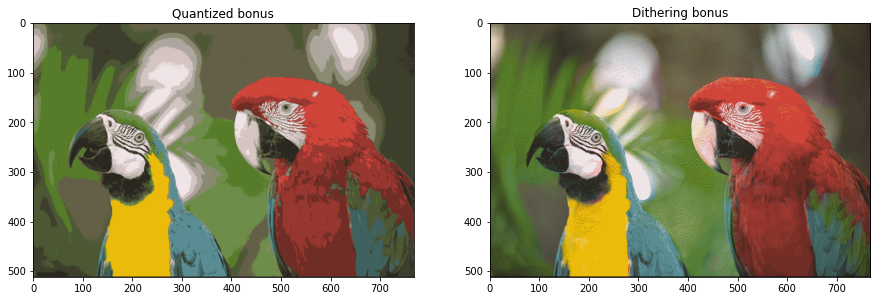

In [27]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121, title="Quantized bonus"), plt.imshow(quantized_bonus.astype(np.uint8))   # optimally quantized
plt.subplot(122, title="Dithering bonus"), plt.imshow(dithering_bonus.astype(np.uint8))   # dithering

(<AxesSubplot:title={'center':'Dithering bonus'}>,
 <matplotlib.image.AxesImage at 0x204c8f08>)

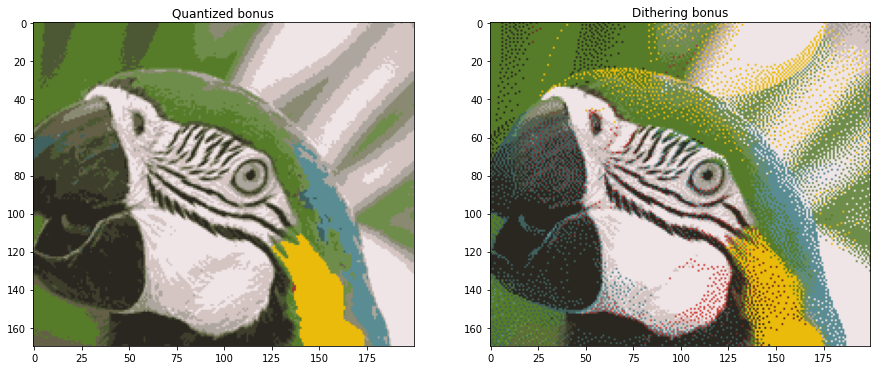

In [28]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121, title="Quantized bonus"), plt.imshow(quantized_bonus.astype(np.uint8)[150:320, 100:300])   # optimally quantized
plt.subplot(122, title="Dithering bonus"), plt.imshow(dithering_bonus.astype(np.uint8)[150:320, 100:300])   # dithering

In [29]:
# Compute average quantization error for dithered image
diff_dith_bonus = img.astype(np.float32) - dithering_bonus.astype(np.float32)
avg_dith_error_bonus = np.mean(np.absolute(diff_dith_bonus))
mse_dith_bonus = np.mean(diff_dith_bonus**2)
print(f'avg_dith_error_bonus: {avg_dith_error_bonus}')
print(f'mse_dith_bonus: {mse_dith_bonus}')

avg_dith_error_bonus: 16.649330139160156
mse_dith_bonus: 660.6438598632812


### Questions

- How does the result look like to you?
- What happens if we use 32 colours?
- And what happens if we use 256 colours?

### Answers

- quantized (16 colors) and dithered images look more realistic, they have lower average quantization errors (more resemble to original). Zoomed dithered image has strange effect of "colored dots" (parrot's head).
- images with 32 colors and 256 colors will have better, more realistic quality and lower average quantization errors.

Original image and 32 colors quantization:
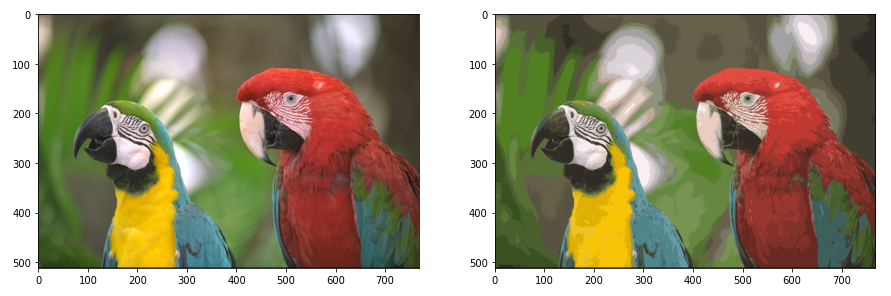
Original image and 256 colors quantization:
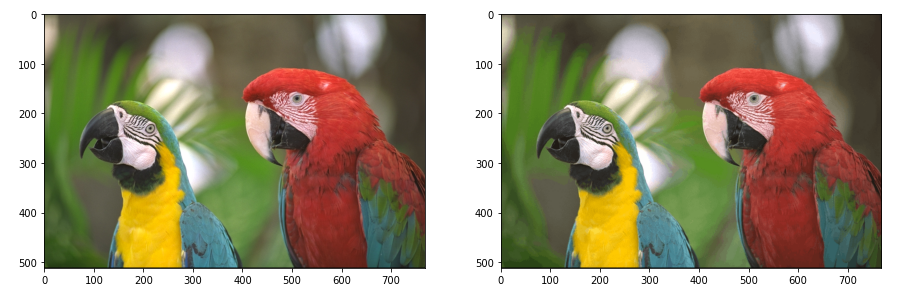